In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pour afficher les graphiques dans le notebook
%matplotlib inline


In [2]:
# Remplace le chemin par ton chemin
file_path = r"C:\Users\mouad\Downloads\heart-disease-dataset\processed.cleveland.data"
# Colonnes principales du dataset Cleveland (14)
columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','target']
data = pd.read_csv(file_path,names=columns)

# Afficher les 5 premières lignes
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# Afficher les dernières lignes
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [4]:
# Compter les valeurs nulles
data.isnull().sum()
# data.info()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Afficher les valeurs uniques dans ca et thal pour voir les anomalies
print("Valeurs uniques dans ca :", data['ca'].unique())
print("Valeurs uniques dans thal :", data['thal'].unique())

Valeurs uniques dans ca : ['0.0' '3.0' '2.0' '1.0' '?']
Valeurs uniques dans thal : ['6.0' '3.0' '7.0' '?']


In [6]:

# Remplacer '?' par NaN et convertir en float
data['ca'] = pd.to_numeric(data['ca'], errors='coerce')
data['thal'] = pd.to_numeric(data['thal'], errors='coerce')

# Vérifier le nombre de NaN après conversion
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [7]:
# Remplacer NaN par le mode, façon compatible pandas 3.0
data['ca'] = data['ca'].fillna(data['ca'].mode()[0])
data['thal'] = data['thal'].fillna(data['thal'].mode()[0])

# Vérifier
print(data.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
# Verifications de Nombre de doublons
print("Nombre de doublons :", data.duplicated().sum())

# Si tu veux afficher quelques doublons
print(data[data.duplicated()])


Nombre de doublons : 0
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


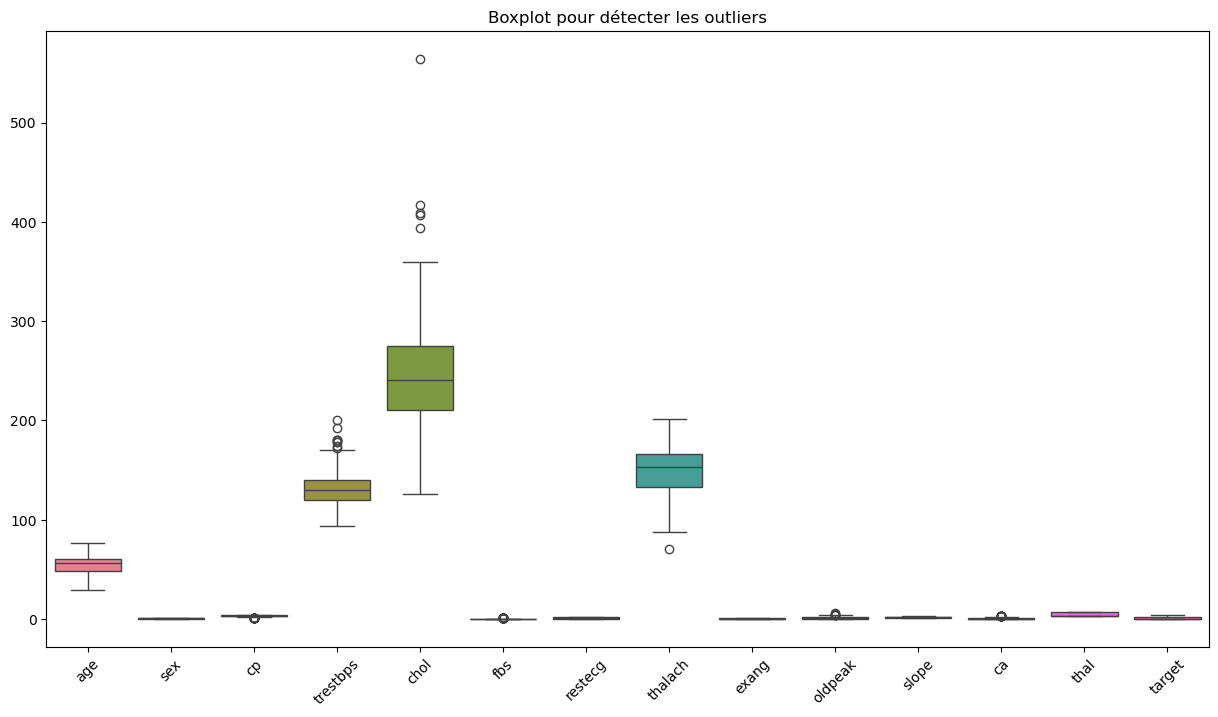

In [9]:
#Vérifier les valeurs aberrantes (outliers)
plt.figure(figsize=(15,8))
sns.boxplot(data=data.select_dtypes(include=['float64','int64']))
plt.xticks(rotation=45)
plt.title("Boxplot pour détecter les outliers")
plt.show()

target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


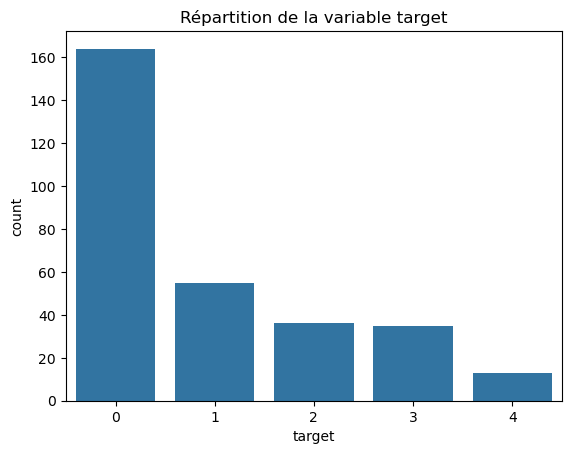

In [10]:
# Vérifier la variable cible target
# Valeurs uniques et distribution
print(data['target'].value_counts())
sns.countplot(x='target', data=data)
plt.title("Répartition de la variable target")
plt.show()

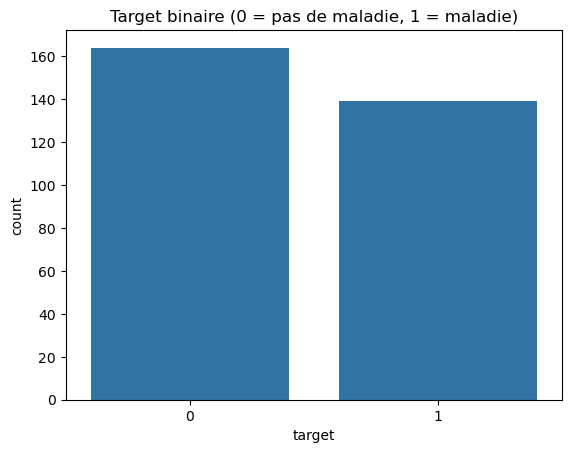

In [11]:
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)
sns.countplot(x='target', data=data)
plt.title("Target binaire (0 = pas de maladie, 1 = maladie)")
plt.show()

In [12]:
#Séparer X (variables explicatives) et y (cible)

# X : toutes les colonnes sauf 'target'
X = data.drop('target', axis=1)

# y : uniquement la colonne 'target'
y = data['target']

print("Dimensions de X :", X.shape)
print("Dimensions de y :", y.shape)


Dimensions de X : (303, 13)
Dimensions de y : (303,)


In [13]:

# ÉTAPE : Train / Test Split


from sklearn.model_selection import train_test_split

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                 # données
    test_size=0.2,        # 20% pour le test
    random_state=42,      # reproductibilité
    stratify=y            # conserver la proportion des classes
)


In [14]:

# ÉTAPE : Normalisation des données

from sklearn.preprocessing import StandardScaler

# Initialisation du scaler
scaler = StandardScaler()

# Apprendre les paramètres sur le TRAIN et transformer
X_train_scaled = scaler.fit_transform(X_train)

# Appliquer la transformation sur le TEST
X_test_scaled = scaler.transform(X_test)

# Vérifier moyenne et écart-type du train
print("Moyenne (train) :", X_train_scaled.mean())
print("Écart-type (train) :", X_train_scaled.std())


Moyenne (train) : -3.387838854545932e-18
Écart-type (train) : 1.0


In [15]:

                                                        # ÉTAPE : Modèle 1 - Logistic Regression


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

# Initialisation du modèle
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Entraînement du modèle
log_reg.fit(X_train_scaled, y_train)

# Prédictions sur le jeu de test
y_pred_log = log_reg.predict(X_test_scaled)


In [16]:
                #TEST DE ACCURACY
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy - Logistic Regression :", accuracy_log)


Accuracy - Logistic Regression : 0.8688524590163934


In [17]:
cm_log = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix :\n", cm_log)


Confusion Matrix :
 [[27  6]
 [ 2 26]]


In [18]:
print("Classification Report :")
print(classification_report(y_test, y_pred_log))


Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [19]:
#             | Modèle              | Accuracy | Precision (1) | Recall (1) | F1-score (1) | FN    |
#             | ------------------- | -------- | ------------- | ---------- | ------------ | ----- |
#             | Logistic Regression | 0.87     | 0.81          | **0.93**   | 0.87         | **2** |


In [20]:
                               # Model 2 Random forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Modèle Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,      # nombre d’arbres
    random_state=42,
    max_depth=None         # laisse l’arbre apprendre librement
)

# Entraîner le modèle
rf_model.fit(X_train_scaled, y_train)

# Prédictions sur le jeu de test
y_pred_rf = rf_model.predict(X_test_scaled)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy - Random Forest :", acc_rf)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix :\n", cm_rf)
    #rapport de classifications:
print("Classification Report :")
print(classification_report(y_test, y_pred_rf))


Accuracy - Random Forest : 0.8852459016393442
Confusion Matrix :
 [[27  6]
 [ 1 27]]
Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



In [21]:
#| Modèle              | Accuracy | Precision (1) | Recall (1) | F1-score (1) | Faux Négatifs |
#| ------------------- | -------- | ------------- | ---------- | ------------ | ------------- |    
#| **Random Forest**   |     0.89 |     0.82      |     0.96   |     0.89     |        1      |


In [22]:
# Récupérer l'importance des variables depuis le modèle Random Forest
importances = rf_model.feature_importances_


In [23]:
import pandas as pd

# Associer chaque variable à son importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Trier par importance décroissante
feature_importance_df = feature_importance_df.sort_values(
    by='Importance',
    ascending=False
)

# Afficher les résultats
feature_importance_df


,Feature,Importance
7,thalach,0.135404
2,cp,0.127163
12,thal,0.122940
11,ca,0.100811
0,age,0.091327
9,oldpeak,0.089358
4,chol,0.088681
3,trestbps,0.080716
8,exang,0.050730
10,slope,0.046626


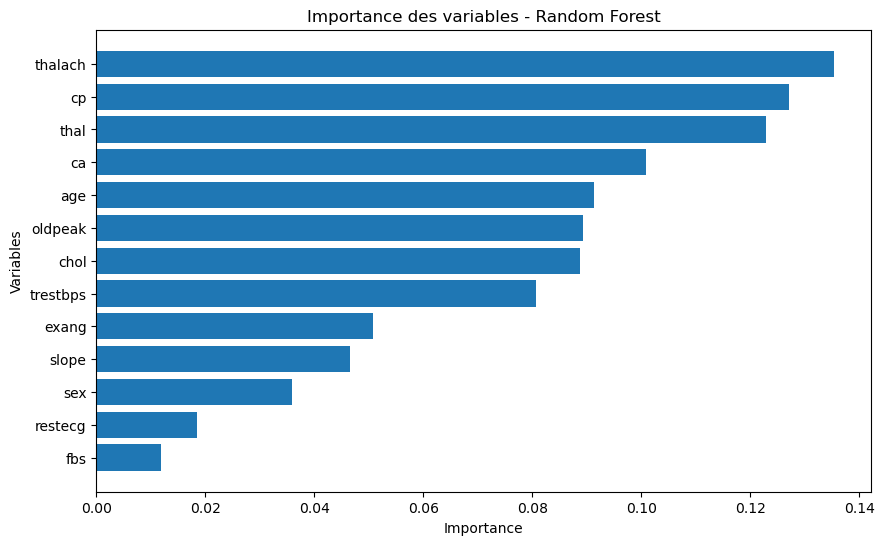

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df['Feature'],
    feature_importance_df['Importance']
)
plt.gca().invert_yaxis()
plt.title("Importance des variables - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.show()


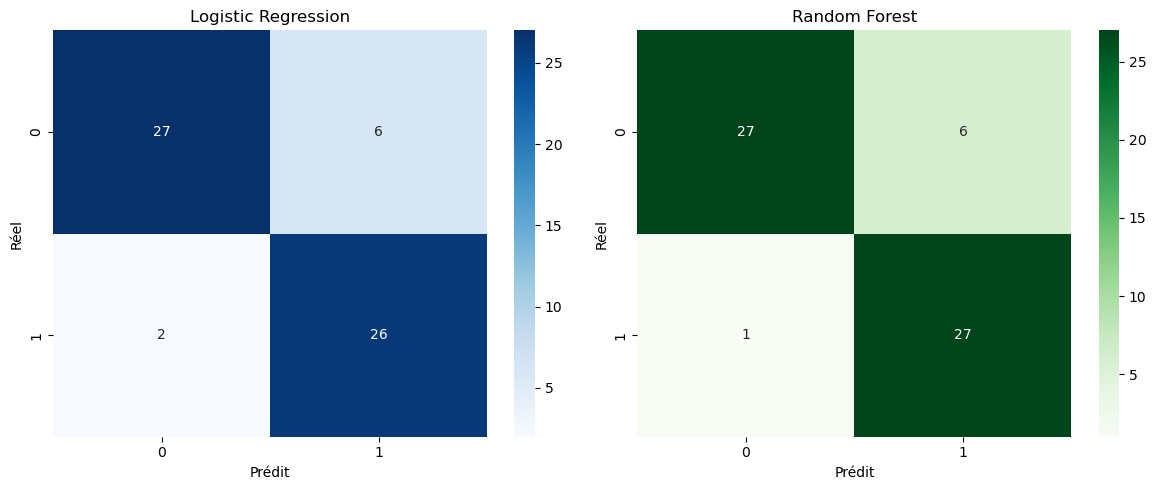

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcul des matrices
cm_log = confusion_matrix(y_test, y_pred_log)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Création de la figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Prédit")
axes[0].set_ylabel("Réel")

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Prédit")
axes[1].set_ylabel("Réel")

plt.tight_layout()
plt.show()


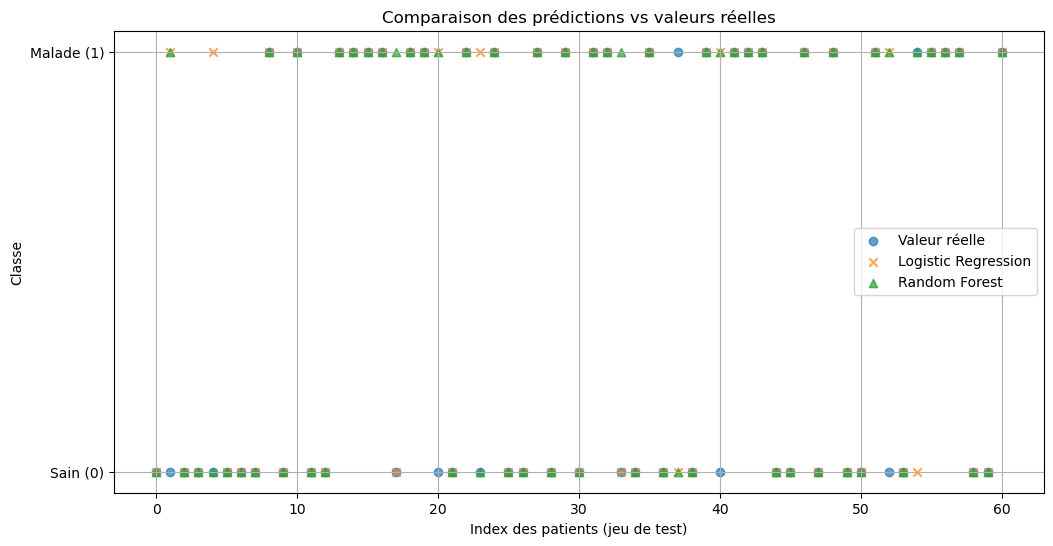

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Index des patients test
indices = np.arange(len(y_test))

plt.figure(figsize=(12, 6))

# Valeurs réelles
plt.scatter(indices, y_test, label="Valeur réelle", marker='o', alpha=0.7)

# Prédictions Logistic Regression
plt.scatter(indices, y_pred_log, label="Logistic Regression", marker='x', alpha=0.7)

# Prédictions Random Forest
plt.scatter(indices, y_pred_rf, label="Random Forest", marker='^', alpha=0.7)

plt.yticks([0, 1], ["Sain (0)", "Malade (1)"])
plt.xlabel("Index des patients (jeu de test)")
plt.ylabel("Classe")
plt.title("Comparaison des prédictions vs valeurs réelles")
plt.legend()
plt.grid(True)
plt.show()


In [39]:
                          #SIMULATION : PRÉDICTION POUR UN NOUVEAU PATIENT avec Random Forest
import pandas as pd

# Nouveau patient (exemple)
new_patient = pd.DataFrame([{
    'age': 58,
    'sex': 1,
    'cp': 4,
    'trestbps': 140,
    'chol': 240,
    'fbs': 0,
    'restecg': 1,
    'thalach': 150,
    'exang': 1,
    'oldpeak': 2.3,
    'slope': 2,
    'ca': 1,
    'thal': 3
}])
#normalisation
new_patient_scaled = scaler.transform(new_patient)
# Classe prédite
prediction = rf_model.predict(new_patient_scaled)[0]

# Probabilités
probabilities = rf_model.predict_proba(new_patient_scaled)[0]

print("=== RÉSULTAT DE LA PRÉDICTION ===")

if prediction == 1:
    print("⚠️ Risque de maladie cardiovasculaire détecté")
else:
    print("✅ Pas de maladie cardiovasculaire détectée")

print(f"Probabilité classe 0 (sain) : {probabilities[0]:.2f}")
print(f"Probabilité classe 1 (malade) : {probabilities[1]:.2f}")


=== RÉSULTAT DE LA PRÉDICTION ===
⚠️ Risque de maladie cardiovasculaire détecté
Probabilité classe 0 (sain) : 0.26
Probabilité classe 1 (malade) : 0.74
